In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
import seaborn as sns
sns.set_context("notebook")
# colors = sns.color_palette("husl",9)
import h5py

font = {'size'   : 14}
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# l = 0.65 is default 
colors = sns.husl_palette(n_colors=9, h=0.01, s=0.9, l=0.65, as_cmap=False)
# colors = np.asarray([(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (0, 198, 248), (135, 133, 0), (0, 167, 108), (189, 189, 189)]) / 255
# colors = np.asarray([(152, 68, 100), (94, 204, 171), (86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138),(205, 205, 205)]) / 255 

In [2]:
# import h5 data named nlpse_data.h5

with h5py.File('nlpse_data/nlpse_data.h5', 'r') as hf:
    # get all variables from data file 
    Rnlpse = hf['R'][:]
    y = hf['y'][:]
    u = hf['u'][:]
    v = hf['v'][:]
    w = hf['w'][:]
    p = hf['p'][:]
    U = hf['U'][:]
    Uy = hf['Uy'][:]
    V = hf['V'][:]

nx = Rnlpse.size

    # alpha_11 = hf['alpha/alpha_11'][:]

print(f"Num stations collected so far = {Rnlpse.size}\n")
print(f"Number of grid points used in the wall normal direction = {u.shape[-1]}\n")


Num stations collected so far = 495

Number of grid points used in the wall normal direction = 100



<Figure size 1200x600 with 0 Axes>

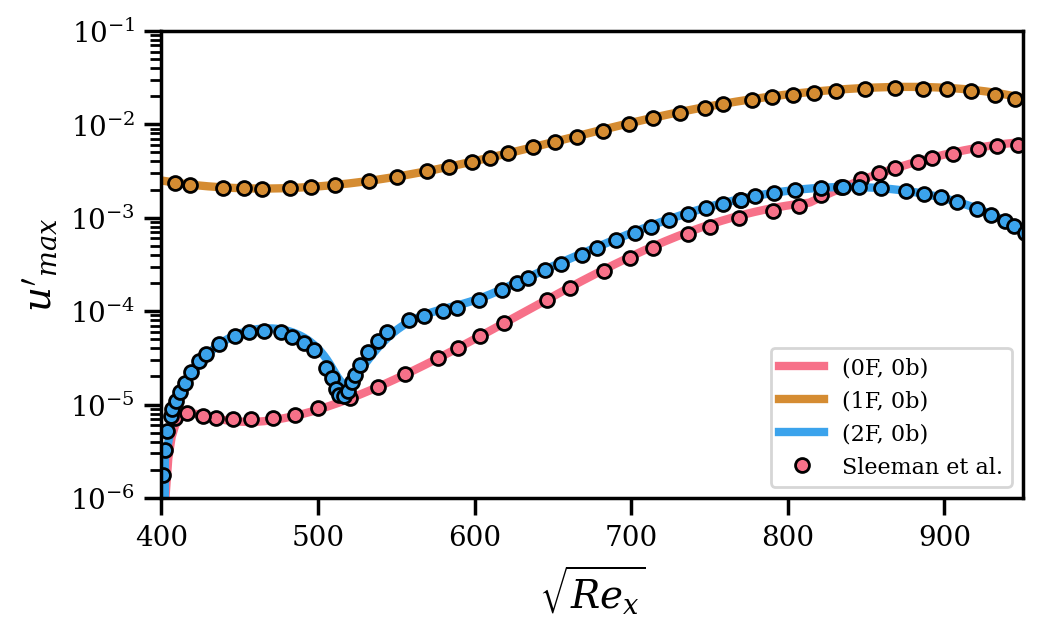

In [3]:
# bert_lpse = np.genfromtxt('ref_data/bertolotti_LPSE_data.csv', delimiter=',')

SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.figure(figsize=(6,3),dpi=200)
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
lw = 3
ms = 5
# mew = 1

bert_nlpse_1f = np.genfromtxt('ref_data/bertolotti_NLPSE_F_data.csv', delimiter=',')
bert_nlpse_2f = np.genfromtxt('ref_data/bert_nlpse_2f.csv', delimiter=',')

chang_u0 = np.genfromtxt('ref_data/chang_u0.csv', delimiter=',')
chang_u1 = np.genfromtxt('ref_data/chang_u1.csv', delimiter=',')
chang_u2 = np.genfromtxt('ref_data/chang_u2.csv', delimiter=',')
chang_u3 = np.genfromtxt('ref_data/chang_u3.csv', delimiter=',')
chang_u4 = np.genfromtxt('ref_data/chang_u4.csv', delimiter=',')
chang_u5 = np.genfromtxt('ref_data/chang_u5.csv', delimiter=',')

owns_u0 = np.genfromtxt('ref_data/owns_u0.csv', delimiter=',')
owns_u1 = np.genfromtxt('ref_data/owns_u1.csv', delimiter=',')
owns_u2 = np.genfromtxt('ref_data/owns_u2.csv', delimiter=',')

umax = np.max(np.abs(u), axis=3)

# set normalization to match Sleeman 
for m in range(umax.shape[0]):
    for n in range(umax.shape[1]):
        if m == 0 and n == 0:
            umax[m,n,:] *= 1
        elif m != 0 and n == 0:
            umax[m,n,:] *= np.sqrt(2)
        elif m == 0 and n != 0:
            umax[m,n,:] *= np.sqrt(2)
        else:
            umax[m,n,:] *= 2 * np.sqrt(2)

# colwidth = 384.0 pt
pt = 1./72.27 # Hundreds of years of history... 72.27 points to an inch.
my_width = 384.0 * pt
golden = (1 + 5 ** 0.5) / 2
my_height = my_width / golden
plt.figure(figsize=(my_width, my_height),dpi=200)
plt.semilogy(Rnlpse, umax[0,0,:nx], color=colors[0], linewidth=lw, label=f'({0}F, {0}b)')
plt.semilogy(Rnlpse, umax[1,0,:nx], color=colors[1], linewidth=lw, label=f'({1}F, {0}b)')
plt.semilogy(Rnlpse, umax[2,0,:nx], color=colors[6], linewidth=lw, label=f'({2}F, {0}b)')
# plt.semilogy(Rnlpse, umax[3,0,:nx], color=colors[3], label=f'({3}F, {0}b)')

# plot reference data
plt.semilogy(owns_u0[:,0], owns_u0[:,1], 'o', markeredgecolor='k', markersize=ms, color=colors[0], label='Sleeman et al.')
plt.semilogy(owns_u1[:,0], owns_u1[:,1], 'o', markeredgecolor='k', markersize=ms,  color=colors[1])
plt.semilogy(owns_u2[:,0], owns_u2[:,1], 'o', markeredgecolor='k', markersize=ms, color=colors[6])

# plt.semilogy(bert_nlpse_1f[:,0], bert_nlpse_1f[:,1], 'o', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[1])
# plt.semilogy(bert_nlpse_2f[:,0], bert_nlpse_2f[:,1], 'o', fillstyle='none', markersize=ms, markeredgewidth=mew, color=colors[2])


plt.legend(prop={'size': 8})
plt.xlabel(r'$\sqrt{Re_x}$', fontsize=14)
plt.ylabel(r"$u'_{max}$", fontsize=14)
plt.ylim([1e-6, 1e-1])
# plt.ylim([0, 5e-3])
# plt.xlim([523, 800])
plt.xlim([400,950])
# plt.title('TS mode breakdown')
plt.tight_layout()
# plt.savefig('ts_mode_breakdown.pdf')

(100, 495, 1, 3)
(100, 495)


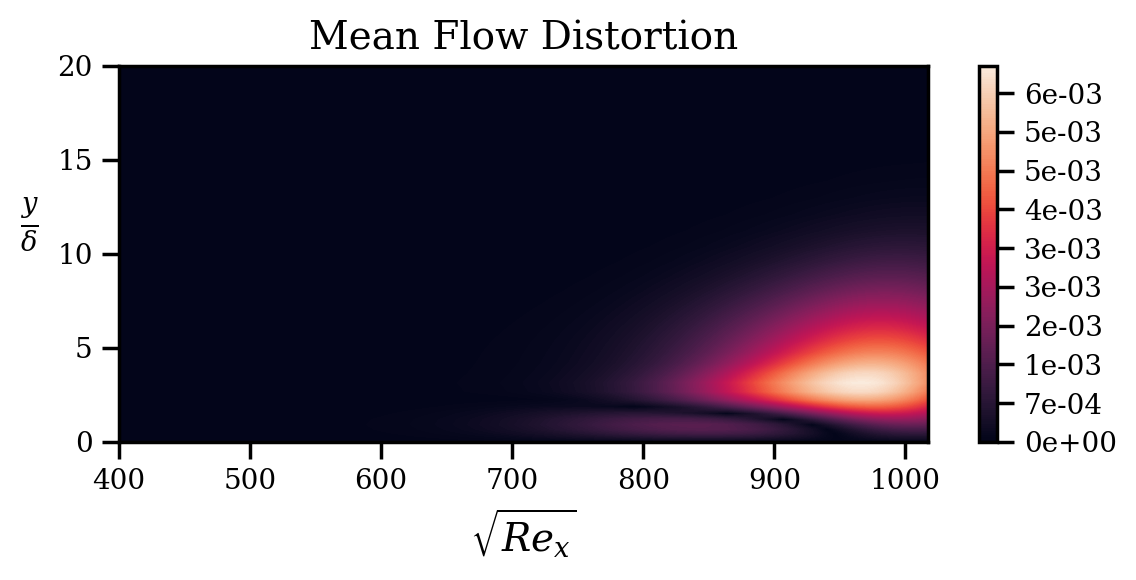

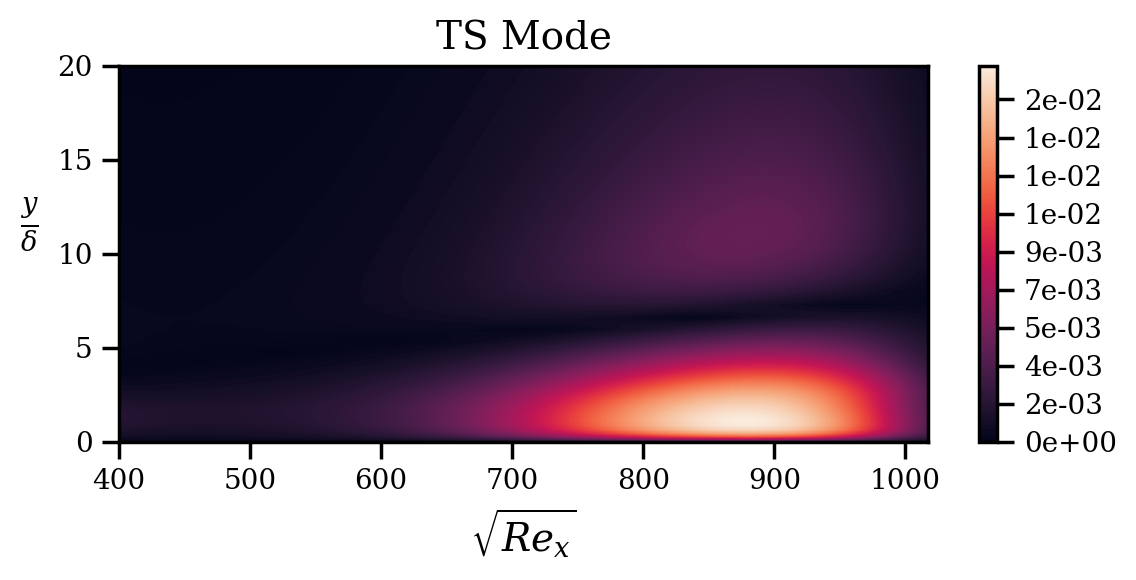

In [4]:
RR, YY = np.meshgrid(Rnlpse, y)

# clf = np.linspace(0, 9.1E-3, 20)

print(u.T.shape)
print(RR.shape)
plt.figure(figsize=(6,3),dpi=200)
plt.contourf(RR, YY, np.abs(u[0,0,:,:].T), 200, cmap='rocket')
clb = plt.colorbar(format='%.0e')
plt.ylim([0,20])

plt.title('Mean Flow Distortion')
plt.xlabel(r'$\sqrt{Re_x}$')
plt.ylabel(r'$\frac{y}{\delta}$', rotation=0, labelpad=10)
# clb.ax.set_title(r'$|u_{0,0}|_{max}$')# cbar = plt.colorbar()
plt.tight_layout()
# cbar.formatter.set_powerlimits((0, 0))
# cbar.formatter.set_useMathText(True)

plt.figure(figsize=(6,3),dpi=200)
plt.contourf(RR, YY, np.abs(u[1,0,:,:].T), 200, cmap='rocket')
clb = plt.colorbar(format='%.0e')
plt.ylim([0,20])

plt.title('TS Mode')
plt.xlabel(r'$\sqrt{Re_x}$')
plt.ylabel(r'$\frac{y}{\delta}$', rotation=0, labelpad=10)
# clb.ax.set_title(r'$|u_{0,0}|_{max}$')# cbar = plt.colorbar()
plt.tight_layout()

In [16]:
print(u.shape)

(3, 1, 495, 100)


(0.0, 20.0)

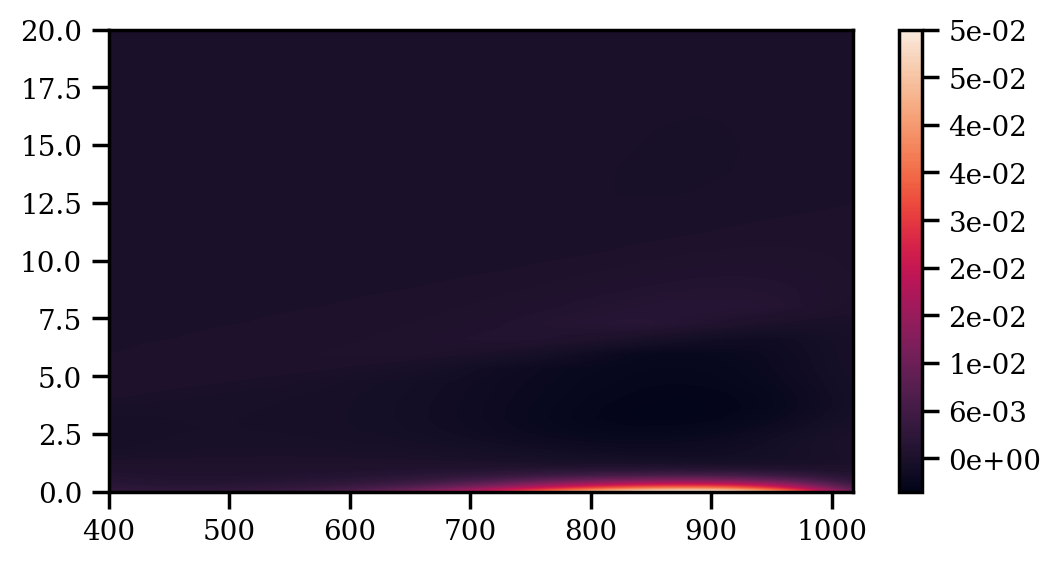

In [21]:
mfd_dy = np.gradient(np.abs(u[0,0,:,:]), y, axis=1)
tsmode_dy = np.gradient(np.abs(u[1,0,:,:]), y, axis=1)

plt.figure(figsize=(6,3),dpi=200)
# plt.contourf(RR, YY, mfd_dy.T, 200, cmap='rocket')
plt.contourf(RR, YY, tsmode_dy.T, 200, cmap='rocket')
clb = plt.colorbar(format='%.0e')
plt.ylim([0,20])


In [5]:
mode = 5
# station = 99
station =1
plt.figure(figsize=(6,3),dpi=200)
plt.plot(np.real(u[mode,station,:]),y,'-')
# plt.vlines(0,0,150)
# plt.hlines(111,-2E-8,2E-8)
# plt.ylim([90,105])
plt.xlabel(r'$u$')
plt.ylabel(r'$y$')
# plt.xlim([-0.0015,0.0015])
plt.ylim([0,20])
plt.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
plt.title(r'$R = $' + f'{Rnlpse[station]:.0f}')
plt.tight_layout()



plt.figure(figsize=(6,3),dpi=200)
plt.plot(np.real(v[mode,station,:]),y,'-')
# plt.vlines(0,0,150)
# plt.hlines(111,-2E-8,2E-8)
# plt.ylim([90,105])
plt.xlabel(r'$v$')
plt.ylabel(r'$y$')
plt.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
plt.tight_layout()

plt.figure(figsize=(6,3),dpi=200)
plt.plot(np.real(w[mode,station,:]),y,'-')
# plt.vlines(0,0,150)
# plt.hlines(111,-2E-8,2E-8)
# plt.ylim([90,105])
plt.xlabel(r'$w$')
plt.ylabel(r'$y$')
plt.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
plt.tight_layout()

plt.figure(figsize=(6,3),dpi=200)
plt.plot(np.real(p[mode,station,:]),y,'-')
# plt.vlines(0,0,150)
# plt.hlines(111,-2E-8,2E-8)
# plt.ylim([90,105])
plt.xlabel(r'$p$')
plt.ylabel(r'$y$')
plt.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
plt.tight_layout()

# compute dp/dx which should be zero in the domain 
# dp = np.abs(p[mode,1:,-1]) - np.abs(p[mode, 0:-1, -1])
# print(np.max(dp))
# print(np.min(dp))

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

IndexError: index 5 is out of bounds for axis 0 with size 3

<Figure size 1200x600 with 0 Axes>

In [ ]:
mode = 0
station = 99

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3),dpi=200,sharey=True,constrained_layout=True)
ax1.plot(np.real(u[mode,station,:]),y,'-',color=c0)
# plt.vlines(0,0,150)
# plt.hlines(111,-2E-8,2E-8)
# plt.ylim([90,105])
ax1.set_xlabel(rf'$u_{mode}$')
ax1.set_ylabel(r'$y$')
ax1.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
ax2.plot(np.real(v[mode,station,:]),y,'-',color=c0)
ax2.set_xlabel(rf'$v_{mode}$')
ax2.ticklabel_format(axis='x', style='sci',scilimits=(0,0))

fig.suptitle(r'$R = $' + f'{Rnlpse[station]:.0f}', fontsize=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3),dpi=200,sharey=True,constrained_layout=True)
ax1.plot(np.real(w[mode,station,:]),y,'-',color=c0)
# plt.vlines(0,0,150)
# plt.hlines(111,-2E-8,2E-8)
# plt.ylim([90,105])
ax1.set_xlabel(rf'$w_{mode}$')
ax1.set_ylabel(r'$y$')
ax1.ticklabel_format(axis='x', style='sci',scilimits=(0,0))

ax2.plot(np.real(p[mode,station,:]),y,'-',color=c0)
ax2.set_xlabel(rf'$p_{mode}$')
ax2.ticklabel_format(axis='x', style='sci',scilimits=(0,0))

fig.suptitle(r'$R = $' + f'{Rnlpse[station]:.0f}', fontsize=10)

In [ ]:
make_disturbance_anim('u',0,save=False);
# make_disturbance_anim('v',0,save=True);
# make_disturbance_anim('w',0,save=True);

# make_disturbance_anim('u',1,save=True);
# make_disturbance_anim('v',1,save=True);
# make_disturbance_anim('w',1,save=True);

# make_disturbance_anim('u',2,save=True);
# make_disturbance_anim('v',2,save=True);
# make_disturbance_anim('w',2,save=True);

# make_disturbance_anim('u',3,save=True);
# make_disturbance_anim('v',3,save=True);
# make_disturbance_anim('w',3,save=True);

In [ ]:
bert_mfd_u = np.genfromtxt('ref_data/bert_mfd_nlpse.csv', delimiter=',')
mode = 0
# station = 99
station = 99
plt.figure(figsize=(6,3),dpi=200)
plt.plot(np.real(u[mode,station,:]),y*0.5,'-', color=c1)
plt.plot(bert_mfd_u[:,0], bert_mfd_u[:,1], 'o', fillstyle='none', markersize=2, color=c2, label="Bertolotti")
# plt.vlines(0,0,150)
# plt.hlines(111,-2E-8,2E-8)
# plt.ylim([90,105])
plt.xlabel(r'$u_{0,0}$')
plt.ylabel(r'$\frac{y}{\delta}$')
plt.xlim([-0.0015,0.0015])
plt.ylim([0,8])
plt.ticklabel_format(axis='x', style='sci',scilimits=(0,0))
plt.title(r'$R = $' + f'{Rnlpse[station]:.0f}')
plt.legend()
plt.tight_layout()